# Spaceship Titanic (Kaggle Leaderboard Top 10%)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Knowing the Data

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## Data Preprocessing

### Missing Values

In [8]:
data = data.fillna(
    {
        'HomePlanet': 'Unknown',
        'CryoSleep': 'False', 
        'Cabin': 'NA/NA/NA', 
        'Destination':'Unknown', 
        'Age': data['Age'].mean(), 
        'VIP': 'False',
        'RoomService': 0,
        'FoodCourt': 0,
        'ShoppingMall': 0,
        'Spa': 0,
        'VRDeck': 0,
    })
test = test.fillna(
    {
        'HomePlanet': 'Unknown',
        'CryoSleep': 'False', 
        'Cabin': 'NA/NA/NA', 
        'Destination':'Unknown', 
        'Age': data['Age'].mean(), 
        'VIP': 'False',
        'RoomService': 0,
        'FoodCourt': 0,
        'ShoppingMall': 0,
        'Spa': 0,
        'VRDeck': 0,
    })

### Feature Engineering

For the `Cabin` Column, we can seperate it into three parts, `deck`, `num`, `side`, the `num` part can be neglected since the type of cabin is mainly determined by the `deck` and `side`.

In [9]:
data['deck'] = data['Cabin'].apply(lambda x: x.split('/')[0])
test['deck'] = test['Cabin'].apply(lambda x: x.split('/')[0])
data['side'] = data['Cabin'].apply(lambda x: x.split('/')[-1])
test['side'] = test['Cabin'].apply(lambda x: x.split('/')[-1])
data.drop(['Cabin'], axis = 1, inplace = True)
test.drop(['Cabin'], axis = 1, inplace = True)

data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


In [10]:
data.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)

data.reset_index(drop = True, inplace = True)
data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,deck,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


## Explanatory Data Analysis

In [11]:
data_columns = data.columns
cat_columns = []
num_columns = []
for col in data_columns:
    if data[col].dtypes == 'object' and col != 'PassengerId' and col != 'last_name':
        cat_columns.append(col)
    elif data[col].dtypes == 'float64' and col != 'PassengerId' and col != 'last_name':
        num_columns.append(col)

### Distribution of Categorical Variable

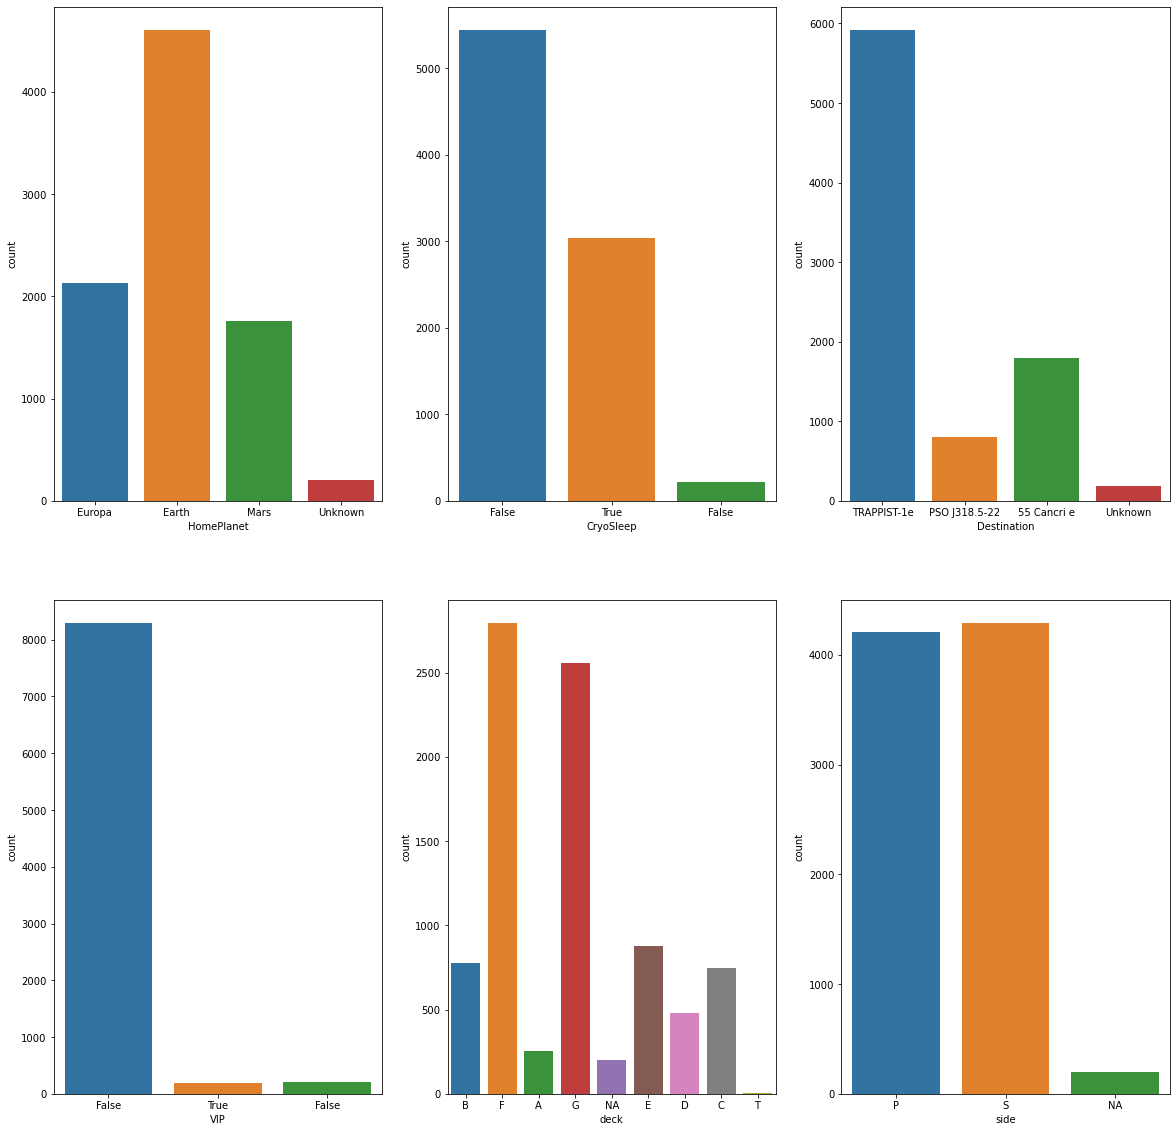

In [12]:
n = len(cat_columns)
plt.figure(figsize = (20, 20))
for i, col in enumerate(cat_columns):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data = data, x = col)
plt.show()

### Distribution of Continuous Variables

In [13]:
num_columns

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

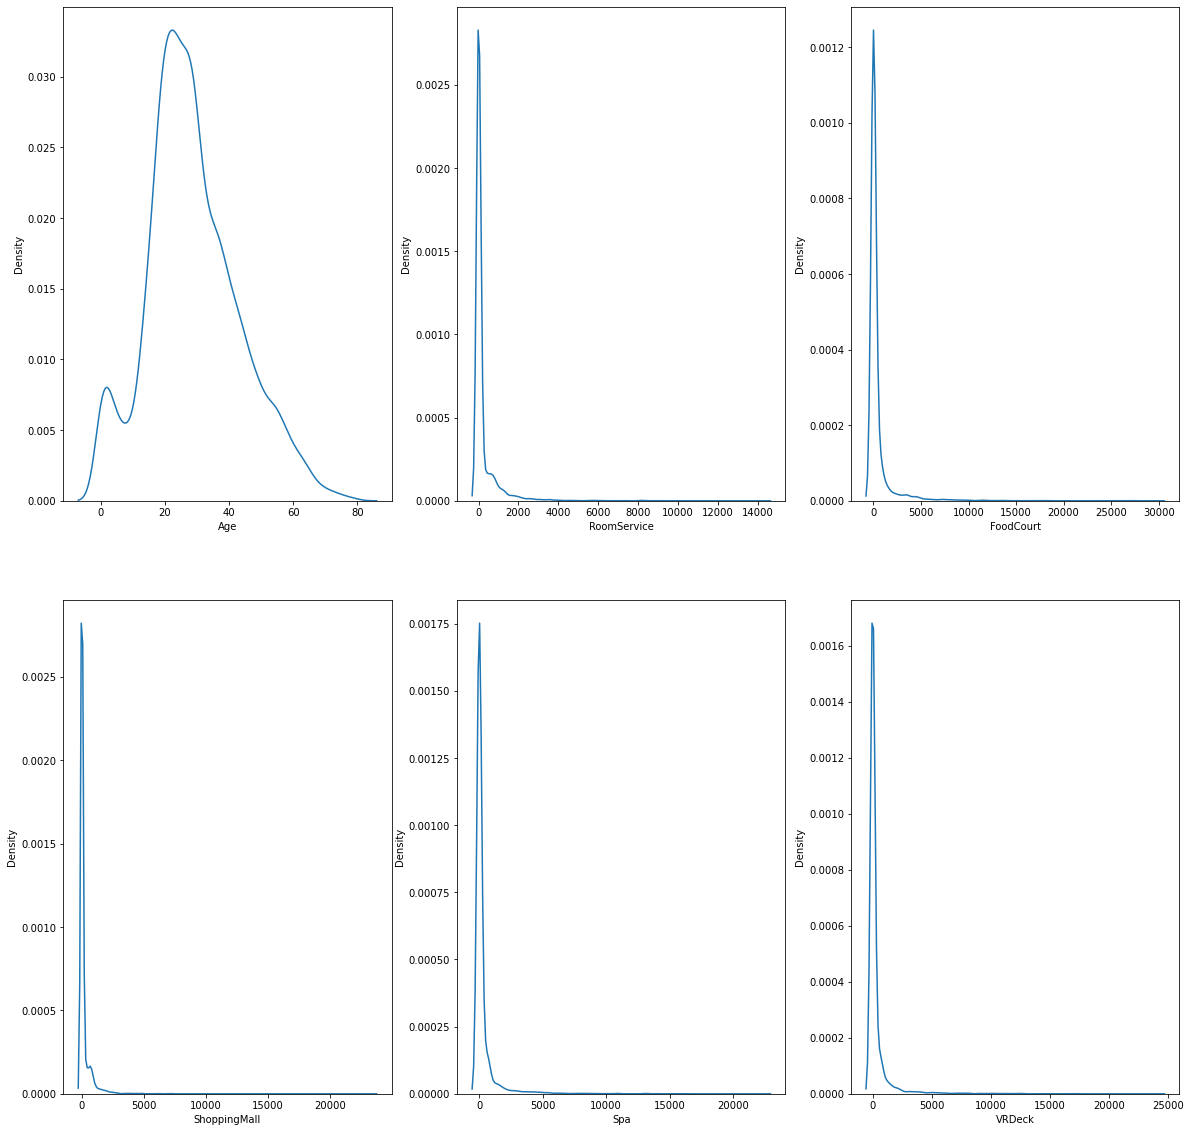

In [14]:
plt.figure(figsize = (20, 20))
for i, col in enumerate(num_columns):
    plt.subplot(2, 3, i + 1)
    sns.kdeplot(data = data, x = col)
plt.show()

## Modelling and Optimization

For this project, I am going to be using Xgboost classifier.

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from hyperopt import hp, fmin, tpe

#dummy eoncoding
ytrain = data['Transported']
Ids = test['PassengerId']
data = data.drop(['Transported', 'PassengerId'], axis = 1)
test = test.drop(['PassengerId'], axis = 1)
xtrain = pd.get_dummies(data)
xtest = pd.get_dummies(test)

In [16]:
xtrain
xtrain = xtrain.loc[:,~xtrain.columns.duplicated()]
xtrain

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,...,deck_C,deck_D,deck_E,deck_F,deck_G,deck_NA,deck_T,side_NA,side_P,side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [17]:
xtest = xtest.loc[:,~xtest.columns.duplicated()]
xtest

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,...,deck_C,deck_D,deck_E,deck_F,deck_G,deck_NA,deck_T,side_NA,side_P,side_S
0,27.00000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,19.00000,0.0,9.0,0.0,2823.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,31.00000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,38.00000,0.0,6652.0,0.0,181.0,585.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,20.00000,10.0,0.0,635.0,0.0,0.0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,34.00000,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4273,42.00000,0.0,847.0,17.0,10.0,144.0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4274,28.82793,0.0,0.0,0.0,0.0,0.0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4275,28.82793,0.0,2680.0,0.0,0.0,523.0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


### Optimization

In [18]:
space = {'n_estimators':hp.quniform('n_estimators', 1000, 4000, 100),
         'gamma':hp.uniform('gamma', 0.01, 0.05),
         'learning_rate':hp.uniform('learning_rate', 0.00001, 0.025),
         'max_depth':hp.quniform('max_depth', 3,7,1),
        }

def objective(params):
    params = {'n_estimators': int(params['n_estimators']),
             'gamma': params['gamma'],
             'learning_rate': params['learning_rate'],
             'max_depth': int(params['max_depth'])}
    
    xb_a= XGBClassifier(**params)
    score = cross_val_score(xb_a, xtrain, ytrain, scoring='accuracy', cv=5, n_jobs=-1).mean()
    return -score
best = fmin(fn= objective, space= space, max_evals=10, algo=tpe.suggest)

100%|███████████████████████████████████████████████| 10/10 [02:07<00:00, 12.74s/trial, best loss: -0.8013368263839581]


In [22]:
best

{'gamma': 0.04915308948519388,
 'learning_rate': 0.01587939803255646,
 'max_depth': 3.0,
 'n_estimators': 1200.0}

### Modelling and Predictions

In [23]:
model = XGBClassifier(
    gamma = best['gamma'],
    learning_rate = best['learning_rate'],
    max_depth = int(best['max_depth']),
    n_estimators = int(best['n_estimators'])
)
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

[15:39:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
predictions_xgb = pd.DataFrame({'PassengerId': Ids, 'Transported': predictions})
predictions_xgb.to_csv('xgb.csv', index = False)